昨日知乎热榜出现了一个话题「全职儿女不是啃老」，发现新闻对象主要集中于豆瓣小组， 咱们可以简单的爬一爬。

![](img/cover.png)

「全职儿女」，一种新型的脱产生活方式，指的是年轻人脱产寄居父母生活，并通过付出一定的劳动换取经济支持，同时保持学习，尝试找到职业目标……豆瓣小组“全职儿女工作交流中心”的小组介绍中这样写道。

<br>



## 一、寻找网址规律

![](img/url1.png)
![](img/url2.png)

点击很多个页面，最后发现网址规律

```
https://www.douban.com/group/{group_id}/members?start={offset}
```

其中

- group_id为小组的id
- offset 为36的倍数，随着页码的增加而增大

In [24]:


template = 'https://www.douban.com/group/{group_id}/members?start={offset}'

for page in range(1, 94):
    url = template.format(group_id='735596', offset=(page-1)*36)
    print(page, ' ', url)

https://www.douban.com/group/735596/members?start=0
https://www.douban.com/group/735596/members?start=36
https://www.douban.com/group/735596/members?start=72
https://www.douban.com/group/735596/members?start=108
https://www.douban.com/group/735596/members?start=144
https://www.douban.com/group/735596/members?start=180
https://www.douban.com/group/735596/members?start=216
https://www.douban.com/group/735596/members?start=252
https://www.douban.com/group/735596/members?start=288
https://www.douban.com/group/735596/members?start=324
https://www.douban.com/group/735596/members?start=360
https://www.douban.com/group/735596/members?start=396
https://www.douban.com/group/735596/members?start=432
https://www.douban.com/group/735596/members?start=468
https://www.douban.com/group/735596/members?start=504
https://www.douban.com/group/735596/members?start=540
https://www.douban.com/group/735596/members?start=576
https://www.douban.com/group/735596/members?start=612
https://www.douban.com/group/735

<br>

## 二、访问测试
尝试对第一页进行方法，为了避免反爬， 访问时加入header伪装头。 最后检查第一页截图与resp.text内容对应上。如果一切顺利，即可定位数据。

In [3]:
import requests

header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

#group_id = '735596'
#url = template.format(group_id=group_id, offset=0)
url = 'https://www.douban.com/group/735596/members?start=0'

resp = requests.get(url, headers=header)
resp.text

'<!DOCTYPE html>\n<html lang="zh-CN">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n        全职儿女工作交流中心小组成员\n</title>\n    \n    \n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <meta http-equiv="Cache-Control" content="no-siteapp" />\n    \n\n    <script >var _head_start = new Date();</script>\n    <script src="https://img1.doubanio.com/f/shire/72ced6df41d4d158420cebdd254f9562942464e3/js/jquery.min.js"></script>\n    <script src="https://img1.doubanio.com/f/shire/4888ee2fda6812f70a064a51c93b84fde8e4a3c2/js/douban.js"></script>\n    <link href="https://img1.doubanio.com/f/shire/204847ecc7d679de915c283531d14f16cfbee65e/css/douban.css" rel="stylesheet" type="text/css">\

<br>

## 三、 定位数据
使用pyquery定位数据， 保存用户昵称、主页链接、id、城市、头像。下图是对应关系和对应的定位pyquery选择器表达式。

pyquery比较难， 建议大家B站搜「大邓 Python网络爬虫快速入门」，有专门的章节讲pyquery。

![](img/pyquery.png)

In [21]:
from pyquery import PyQuery

doc = PyQuery(resp.text)
for item in doc.items('.member-item'):
    data = {
        'name': item('.name a').text(),
        'link': item('.name a').attr('href'),
        'id': item('.name a').attr('href').split('/')[-2],
        'city': item('.name .pl').text().replace('(', '').replace(')', ''),
        'avatar': item('.pic a img').attr('src'),
        
    }
    print(data)

{'name': '无聊ớ ₃ờ', 'link': 'https://www.douban.com/people/meetyuan/', 'id': 'meetyuan', 'city': '重庆', 'avatar': 'https://img9.doubanio.com/icon/up215413041-5.jpg'}
{'name': '无聊ớ ₃ờ', 'link': 'https://www.douban.com/people/meetyuan/', 'id': 'meetyuan', 'city': '重庆', 'avatar': 'https://img9.doubanio.com/icon/up215413041-5.jpg'}
{'name': 'Fortis817', 'link': 'https://www.douban.com/people/139539208/', 'id': '139539208', 'city': '商丘', 'avatar': 'https://img2.doubanio.com/icon/up139539208-1.jpg'}
{'name': '泛思哲', 'link': 'https://www.douban.com/people/caozhe1/', 'id': 'caozhe1', 'city': '界首', 'avatar': 'https://img1.doubanio.com/icon/up6807132-7.jpg'}
{'name': '明月渡鴻影', 'link': 'https://www.douban.com/people/234804718/', 'id': '234804718', 'city': '', 'avatar': 'https://img2.doubanio.com/icon/up234804718-1.jpg'}
{'name': '火焰大地', 'link': 'https://www.douban.com/people/138762699/', 'id': '138762699', 'city': '武汉', 'avatar': 'https://img2.doubanio.com/icon/up138762699-2.jpg'}
{'name': '怕上火喝王老熊',

<br>

## 四、存储数据
使用csv的字典写入方式，存储数据。

In [18]:
import csv

group_id = '735596'

with open(f'{group_id}.csv', 'w', newline='', encoding='utf-8') as csvf:
    #定义csv内的字段
    fieldnames = ['name', 'link', 'id', 'city', 'avatar']
    writer = csv.DictWriter(csvf, fieldnames=fieldnames)
    writer.writeheader()
    
    doc = PyQuery(resp.text)
    for item in doc.items('.member-item'):
        data = {
            'name': item('.name a').text(),
            'link': item('.name a').attr('href'),
            'id': item('.name a').attr('href').split('/')[-2],
            'city': item('.name .pl').text().replace('(', '').replace(')', ''),
            'avatar': item('.pic a img').attr('src'),

        }
        
        #逐行写入
        writer.writerow(data)

<br>

## 五、汇总代码
将一、二、三、四等部分汇总合并，调整代码，既可以采集该豆瓣小组的信息。

In [26]:
import requests
import csv
import time

header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
template = 'https://www.douban.com/group/{group_id}/members?start={offset}'

group_id = '735596'

with open(f'{group_id}.csv', 'w', newline='', encoding='utf-8') as csvf:
    #定义csv内的字段
    fieldnames = ['name', 'link', 'id', 'city', 'avatar']
    writer = csv.DictWriter(csvf, fieldnames=fieldnames)
    writer.writeheader()
    
    for page in range(1, 94):
        print(f'正在采集page: {page} ')
        time.sleep(1)
        url = template.format(group_id=group_id, offset=(page-1)*36)
        resp = requests.get(url, headers=header)
        doc = PyQuery(resp.text)
        for item in doc.items('.member-item'):
            data = {
                'name': item('.name a').text(),
                'link': item('.name a').attr('href'),
                'id': item('.name a').attr('href').split('/')[-2],
                'city': item('.name .pl').text().replace('(', '').replace(')', ''),
                'avatar': item('.pic a img').attr('src'),

            }
            #逐行写入
            writer.writerow(data)

正在采集page: 1 
正在采集page: 2 
正在采集page: 3 
正在采集page: 4 
正在采集page: 5 
正在采集page: 6 
正在采集page: 7 
正在采集page: 8 
正在采集page: 9 
正在采集page: 10 
正在采集page: 11 
正在采集page: 12 
正在采集page: 13 
正在采集page: 14 
正在采集page: 15 
正在采集page: 16 
正在采集page: 17 
正在采集page: 18 
正在采集page: 19 
正在采集page: 20 
正在采集page: 21 
正在采集page: 22 
正在采集page: 23 
正在采集page: 24 
正在采集page: 25 
正在采集page: 26 
正在采集page: 27 
正在采集page: 28 
正在采集page: 29 
正在采集page: 30 
正在采集page: 31 
正在采集page: 32 
正在采集page: 33 
正在采集page: 34 
正在采集page: 35 
正在采集page: 36 
正在采集page: 37 
正在采集page: 38 
正在采集page: 39 
正在采集page: 40 
正在采集page: 41 
正在采集page: 42 
正在采集page: 43 
正在采集page: 44 
正在采集page: 45 
正在采集page: 46 
正在采集page: 47 
正在采集page: 48 
正在采集page: 49 
正在采集page: 50 
正在采集page: 51 
正在采集page: 52 
正在采集page: 53 
正在采集page: 54 
正在采集page: 55 
正在采集page: 56 
正在采集page: 57 
正在采集page: 58 
正在采集page: 59 
正在采集page: 60 
正在采集page: 61 
正在采集page: 62 
正在采集page: 63 
正在采集page: 64 
正在采集page: 65 
正在采集page: 66 
正在采集page: 67 
正在采集page: 68 
正在采集page: 69 
正在采集page: 70 
正在采集page: 71 
正在采集page: 72 
正

## 六、欣赏结果
读取数据， 欣赏下结果。

In [27]:
import pandas as pd

df = pd.read_csv('735596.csv', encoding='utf-8')
print('小组成员数量: ', len(df))
df.head()

记录数:  3317


,name,link,id,city,avatar
0,无聊ớ ₃ờ,https://www.douban.com/people/meetyuan/,meetyuan,重庆,https://img9.doubanio.com/icon/up215413041-5.jpg
1,无聊ớ ₃ờ,https://www.douban.com/people/meetyuan/,meetyuan,重庆,https://img9.doubanio.com/icon/up215413041-5.jpg
2,Mastermind,https://www.douban.com/people/226409273/,226409273,青岛,https://img2.doubanio.com/icon/up226409273-1.jpg
3,周丘,https://www.douban.com/people/270043402/,270043402,NaN,https://img1.doubanio.com/icon/user_normal.jpg
4,Fortis817,https://www.douban.com/people/139539208/,139539208,商丘,https://img2.doubanio.com/icon/up139539208-1.jpg


In [36]:
df.city.value_counts(ascending=False)

北京               235
上海               148
广州                78
深圳                61
南京                58
                ... 
河池                 1
Faroe Islands      1
Coventry           1
丽江                 1
Warszawa           1
Name: city, Length: 275, dtype: int64

<AxesSubplot:ylabel='city'>

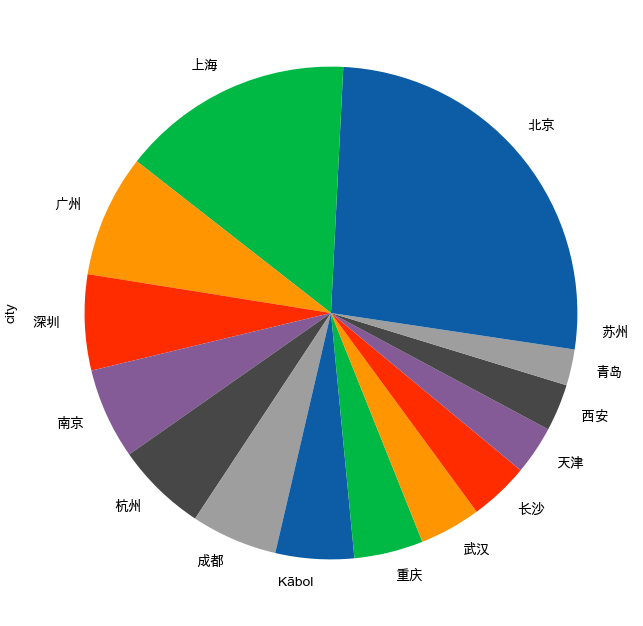

In [51]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'svg')
import scienceplots
import platform
plt.style.use(['science', 'no-latex', 'cjk-sc-font'])
system = platform.system()  # 获取操作系统类型

if system == 'Windows':
    font = {'family': 'SimHei'}
elif system == 'Darwin':
    font = {'family': 'Arial Unicode MS'}
else:
    font = {'family': 'sans-serif'}
matplotlib.rc('font', **font)  # 设置全局字体

plt.figure(figsize=(12, 8))
df.city.value_counts(ascending=False)[:15].plot(kind='pie')

在饼形图中可以看到，全职儿女坐标主要集中于大城市。 需要注意， 豆瓣用户标注的地理位置，不一定体现现在所处的位置。